# IMPORTING LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Data Understanding 

In [2]:
# Reading the dataset from a CSV file into a DataFrame
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
# Displaying the first 5 rows of the DataFrame
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Displaying the shape of the DataFrame (number of rows and columns)
df.shape

(100000, 9)

In [5]:
# Displaying information about the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Displaying the number of unique values in each column
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

### OneHot encoding

In [7]:
# Defining a function to perform one-hot encoding for the 'gender' column
def one_hot_encode_gender(df):
    for val in sorted(list(df['gender'].unique())):
        key = f'gender_{val}'
        df[key] = (df['gender'] == val).astype(float)
    return df
# Applying the one-hot encoding function to the DataFrame
df = one_hot_encode_gender(df)
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0,0.0,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,1.0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0,0.0,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0,1.0,0.0


In [8]:
# Defining a function to perform one-hot encoding for the 'smoking_history' column
def one_hot_encode_smoking_history(df):
    for val in sorted(list(df['smoking_history'].unique())):
        key = f'smoking_history_{val}'
        df[key] = (df['smoking_history'] == val).astype(float)
    return df

# Applying the one-hot encoding function to the DataFrame
df = one_hot_encode_smoking_history(df)
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
#Removing object datatype
df = df.select_dtypes(exclude=['object'])

In [10]:
# Moving 'diabetes' column to the last position as it is the target column
df = df[[col for col in df.columns if col != 'diabetes'] + ['diabetes']]

In [11]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,80.0,0,1,25.19,6.6,140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,54.0,0,0,27.32,6.6,80,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,28.0,0,0,27.32,5.7,158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,36.0,0,0,23.45,5.0,155,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,76.0,1,1,20.14,4.8,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [12]:
#checking if there are any duplicate values
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3854


In [13]:
# Droping duplicate rows and update the DataFrame
df = df.drop_duplicates()

In [14]:
df.shape

(96146, 16)

### Understanding the features in the dataset.

In [15]:
# Correlation Matrix

In [16]:
# Creating a correlation matrix for the DataFrame
correlation_matrix = df.corr()

In [17]:
# Calculating the correlation of features with the target variable 'diabetes'
target_correlation = df.corr()['diabetes'].sort_values(ascending=False)

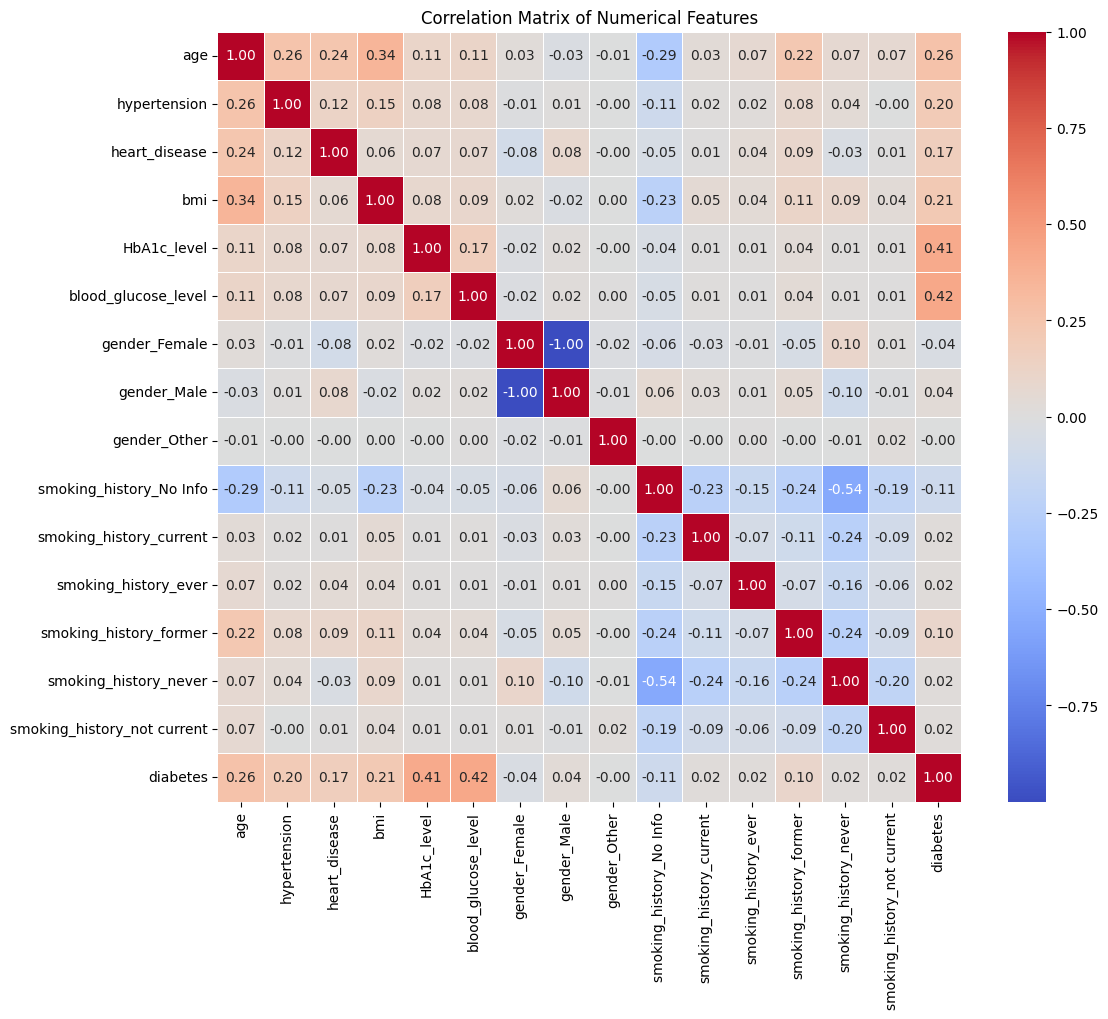

In [18]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Number of instances with hypertension: 7461
Number of instances without hypertension: 88685


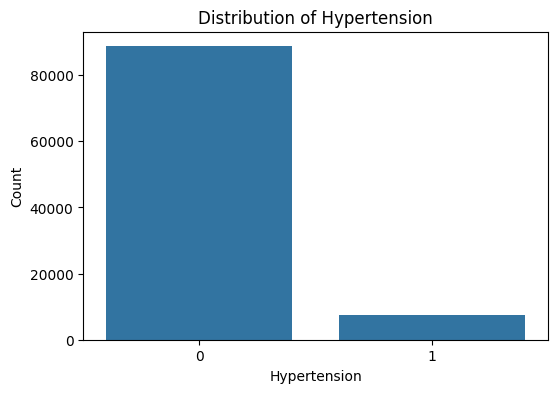

In [19]:
# Plotting the distribution of Hypertension
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', data=df)
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Displaying counts of instances with and without hypertension
hypertension_counts = df['hypertension'].value_counts()
print(f"Number of instances with hypertension: {hypertension_counts[1]}")
print(f"Number of instances without hypertension: {hypertension_counts[0]}")

plt.show()


In [21]:
# Analyzing the relationship between 'hypertension' and 'heart_disease' with 'diabetes'
features_to_analyze = ['hypertension', 'heart_disease']

for feature in features_to_analyze:
    # Create a crosstab to analyze the relationship between the feature and diabetes
    feature_diabetes_crosstab = pd.crosstab(df[feature], df['diabetes'])

    # Print the crosstab
    print(f"\nCross-tabulation for {feature} and Diabetes:")
    print(feature_diabetes_crosstab)

    # Extract the counts for specific conditions
    with_feature_diabetes = feature_diabetes_crosstab.loc[1, 1] if 1 in feature_diabetes_crosstab.index else 0
    without_feature_diabetes = feature_diabetes_crosstab.loc[0, 1] if 0 in feature_diabetes_crosstab.index else 0

    print(f"Number of instances with {feature} and diabetes: {with_feature_diabetes}")
    print(f"Number of instances without {feature} and diabetes: {without_feature_diabetes}\n")


Cross-tabulation for hypertension and Diabetes:
diabetes          0     1
hypertension             
0             82289  6396
1              5375  2086
Number of instances with hypertension and diabetes: 2086
Number of instances without hypertension and diabetes: 6396


Cross-tabulation for heart_disease and Diabetes:
diabetes           0     1
heart_disease             
0              85008  7215
1               2656  1267
Number of instances with heart_disease and diabetes: 1267
Number of instances without heart_disease and diabetes: 7215



In [26]:
# Analyzing correlations between selected features and 'diabetes'
features_to_analyze = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
                        'gender_Female', 'gender_Male', 'gender_Other', 'smoking_history_No Info',
                        'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_not current']

# Calculate feature correlations with 'diabetes'
feature_correlations = df[features_to_analyze].apply(lambda x: x.corr(df['diabetes']))

# Print the correlations
for feature, correlation in zip(features_to_analyze, feature_correlations):
    print(f"Correlation between {feature} and Diabetes: {correlation:.3f}")

Correlation between hypertension and Diabetes: 0.196
Correlation between heart_disease and Diabetes: 0.171
Correlation between bmi and Diabetes: 0.215
Correlation between HbA1c_level and Diabetes: 0.406
Correlation between blood_glucose_level and Diabetes: 0.424
Correlation between gender_Female and Diabetes: -0.038
Correlation between gender_Male and Diabetes: 0.038
Correlation between gender_Other and Diabetes: -0.004
Correlation between smoking_history_No Info and Diabetes: -0.113
Correlation between smoking_history_current and Diabetes: 0.017
Correlation between smoking_history_ever and Diabetes: 0.022
Correlation between smoking_history_former and Diabetes: 0.095
Correlation between smoking_history_not current and Diabetes: 0.019


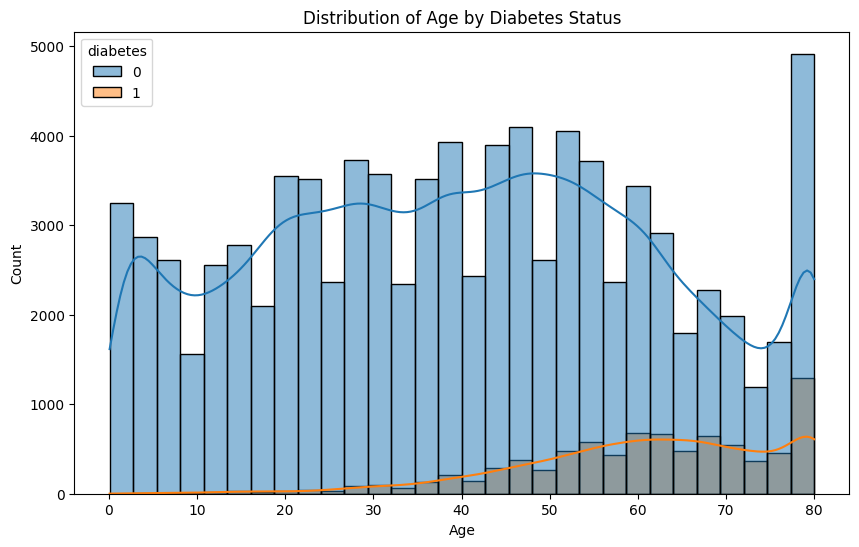

In [27]:
# Plotting the distribution of age by diabetes status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='diabetes', bins=30, kde=True)
plt.title('Distribution of Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [28]:
# Displaying the BMI range
bmi_range = df['bmi'].describe()[['min', 'max']]
print("BMI Range:")
print(bmi_range)

BMI Range:
min    10.01
max    95.69
Name: bmi, dtype: float64


/var/folders/v6/n1dczd5x139519p8ymghdlkr0000gn/T/ipykernel_83624/3095516266.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='muted')


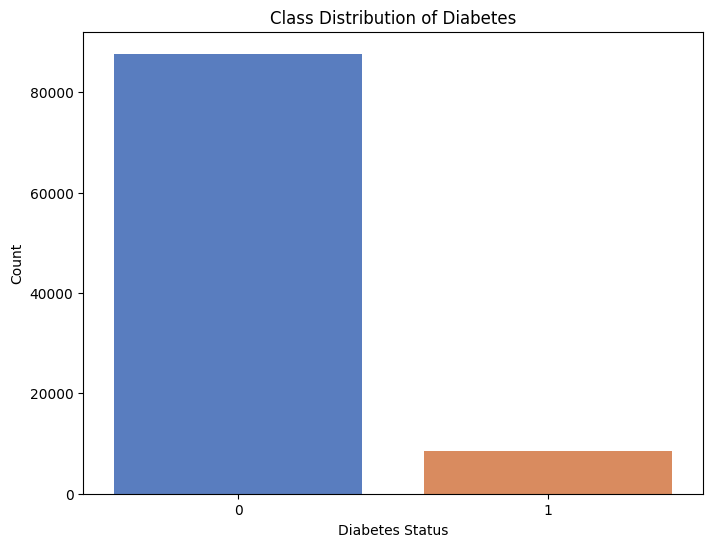

In [29]:
# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diabetes', palette='muted')
plt.title('Class Distribution of Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

### Class Imbalance

In [22]:
# Displaying the class distribution
class_distribution = df['diabetes'].value_counts()
total_instances = len(df)

percentage_distribution = (class_distribution / total_instances) * 100

print("Class Distribution:")
for class_label, count, percentage in zip(class_distribution.index, class_distribution, percentage_distribution):
    print(f"Class {class_label}: Count = {count}, Percentage = {percentage:.2f}%")


Class Distribution:
Class 0: Count = 87664, Percentage = 91.18%
Class 1: Count = 8482, Percentage = 8.82%


# MACHINE LEARNING

### Approach 1: Direct Random Forest

In [27]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Printing classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



### Approach 2: HyperTuned and Final Model Evaluation

In [36]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [37]:
# Final Model Evaluation
# Make predictions on the test set using the tuned model
y_pred_tuned = best_rf_classifier.predict(X_test)

# Evaluate performance of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")

# Print classification report for detailed metrics
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.97
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.68      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



### Approach 3: SMOTE + Random Forest

In [39]:
from imblearn.over_sampling import SMOTE

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the resampled data
rf_classifier.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Printing classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.87      0.71      0.78      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.85      0.88     19230
weighted avg       0.96      0.96      0.96     19230



### Approach 4: SMOTE + Random Forest + HyperTuned

In [40]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters on the resampled data
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Printing classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.87      0.71      0.78      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.85      0.88     19230
weighted avg       0.96      0.96      0.96     19230

